In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tikzplotlib

In [2]:
# function to determine time delay

# DM units pc * cm^3
# nu units MHz

def delay(DM, nu):
    k = 4.148808e+3
    
    return k * DM * (nu**-2)

In [20]:
def plotPulse(DataFrame, x, y, num_x_bins, num_y_bins, name):
    plt.imshow(DataFrame, aspect='auto')
#     plt.xlabel('Time')
#     plt.ylabel('Frequency')
    # x is the grid to which your data corresponds
    nx = x.shape[0]
    step_x = int(nx / (num_x_bins - 1)) # step between consecutive labels
    x_positions = np.arange(0,nx,step_x) # pixel count at label position
    x_labels = x[::step_x].round() # labels you want to see
    x_labels = x_labels.astype(int)
    plt.xticks(x_positions, x_labels)
    
    # y is the y axis grid
    ny = y.shape[0]
    step_y = int(ny / (num_y_bins - 1))
    y_positions = np.arange(0, ny, step_y)
    y_labels = y[::step_y].round()
    y_labels = y_labels.astype(int)
    plt.yticks(y_positions, y_labels)
    
    plt.savefig(name, bbox_inches='tight')
    plt.show()

In [4]:
data = np.load('./final_pulsar_data.npy')
data.shape

(32, 254)

In [5]:
df = pd.DataFrame(data)

In [6]:
x_bins = np.arange(0, 16 * 254, 16) # time in ms
y_bins = np.linspace(800, 400, 32) # frequency in MHz
print(y_bins, x_bins)

[800.         787.09677419 774.19354839 761.29032258 748.38709677
 735.48387097 722.58064516 709.67741935 696.77419355 683.87096774
 670.96774194 658.06451613 645.16129032 632.25806452 619.35483871
 606.4516129  593.5483871  580.64516129 567.74193548 554.83870968
 541.93548387 529.03225806 516.12903226 503.22580645 490.32258065
 477.41935484 464.51612903 451.61290323 438.70967742 425.80645161
 412.90322581 400.        ] [   0   16   32   48   64   80   96  112  128  144  160  176  192  208
  224  240  256  272  288  304  320  336  352  368  384  400  416  432
  448  464  480  496  512  528  544  560  576  592  608  624  640  656
  672  688  704  720  736  752  768  784  800  816  832  848  864  880
  896  912  928  944  960  976  992 1008 1024 1040 1056 1072 1088 1104
 1120 1136 1152 1168 1184 1200 1216 1232 1248 1264 1280 1296 1312 1328
 1344 1360 1376 1392 1408 1424 1440 1456 1472 1488 1504 1520 1536 1552
 1568 1584 1600 1616 1632 1648 1664 1680 1696 1712 1728 1744 1760 1776
 1792 18

In [7]:
df = df.set_axis(x_bins, axis=1)
df = df.set_axis(y_bins, axis=0)
df

,0,16,32,48,64,80,96,112,128,144,...,3904,3920,3936,3952,3968,3984,4000,4016,4032,4048
800.000000,0.163817,0.068998,-0.163449,0.041811,-0.018957,-0.092539,-0.070937,-0.113474,-0.026090,0.045521,...,0.006207,-0.004852,0.038679,-0.111674,-0.058088,-0.002743,0.129618,-0.055642,0.047163,0.105931
787.096774,0.049876,-0.220564,-0.085277,-0.147159,-0.082441,-0.184481,-0.195284,-0.150726,-0.230453,-0.223041,...,-0.034260,0.279052,0.075883,0.280524,0.123460,0.031114,0.243861,-0.049153,0.187572,0.135400
774.193548,-0.429695,-0.016228,-0.098782,-0.225368,-0.323773,-0.273726,-0.231625,-0.360068,-0.080143,-0.197472,...,-0.003816,0.206021,0.005604,0.288423,0.140131,0.059050,0.393353,-0.035154,-0.159978,0.213625
761.290323,0.155803,0.098660,-0.019358,-0.037832,0.053782,-0.021664,-0.071690,-0.000020,0.005497,0.218473,...,0.064044,0.043256,-0.005820,0.114097,0.006591,-0.098348,-0.120637,-0.047657,0.077170,-0.054323
748.387097,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
735.483871,-0.129114,-0.007080,-0.202583,-0.143456,-0.227667,-0.044190,0.111019,-0.041795,0.111611,0.022318,...,-0.056283,-0.027160,0.023785,0.066862,0.038183,-0.009169,-0.023030,0.021937,-0.139826,-0.011284
722.580645,-0.282613,-0.034865,-0.248152,-0.122703,-0.261551,-0.191970,-0.107388,0.141421,0.117075,0.084984,...,-0.110395,-0.130630,0.149520,-0.051115,-0.175320,-0.145161,0.320960,0.188209,0.093917,-0.140860
709.677419,-0.182077,-0.129711,-0.141343,-0.506624,-0.418454,-0.158479,-0.409904,-0.233353,-0.292607,-0.330527,...,-0.135335,0.149911,0.336122,0.175715,0.082614,0.021348,0.104466,-0.115725,-0.115083,0.027268
696.774194,-0.224182,-0.339143,-0.516707,-0.395984,-0.414956,-0.385114,-0.483010,-0.643196,-0.086406,-0.448548,...,0.202213,0.198853,0.226287,-0.059756,0.157690,0.190801,0.056981,-0.253967,0.024711,0.098523
683.870968,-0.357105,-0.145340,-0.313031,-0.312880,-0.486994,-0.254812,-0.368316,-0.441791,-0.072549,-0.376654,...,0.084614,0.157785,0.026310,-0.235704,0.114932,0.281780,-0.209166,-0.043140,0.358585,0.053296


In [8]:
def shiftARowRight(row_index, num_bins, df):
    len_row = df.shape[1]
    for col_index in range(len_row-1, num_bins-1, -1):
        df.iat[row_index, col_index] = df.iat[row_index, col_index-num_bins]
    for col_index2 in range(0, num_bins):
        df.iat[row_index, col_index2] = np.nan
        
def shiftARowLeft(row_index, num_bins, df):
    len_row = df.shape[1]
    for col_index in range(0, len_row-num_bins):
        df.iat[row_index, col_index] = df.iat[row_index, col_index+num_bins]
    for col_index2 in range(len_row-1, len_row-num_bins-1, -1):
        df.iat[row_index, col_index2] = np.nan

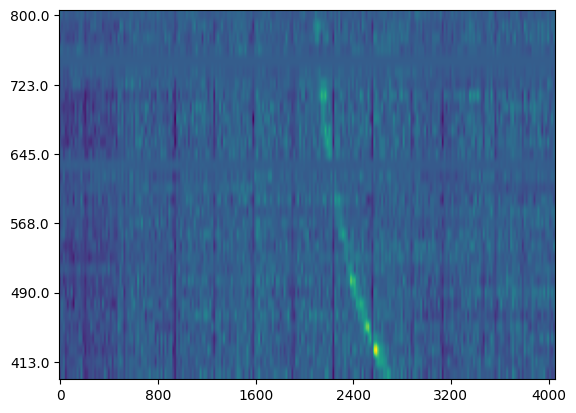

In [19]:
plotPulse(df, x_bins, y_bins, 6, 6, 'dm0')

In [10]:
def test_DM(DM, x_bins, y_bins, df):
    time_shifts = []

    for y_val in y_bins:
        del_t = delay(DM, y_val)
        time_shifts.append(del_t)

    time_shifts = [i * 1000/16 for i in time_shifts] # convert to milliseconds
    bin_shifts = np.ceil(time_shifts) # 1 bin is 16 ms
    bin_shifts = bin_shifts.astype(int)
    
    df1 = df.copy()
    num_rows = df1.shape[0]

    for row in range(num_rows):
        shiftARowLeft(row, bin_shifts[row], df1)

    return df1

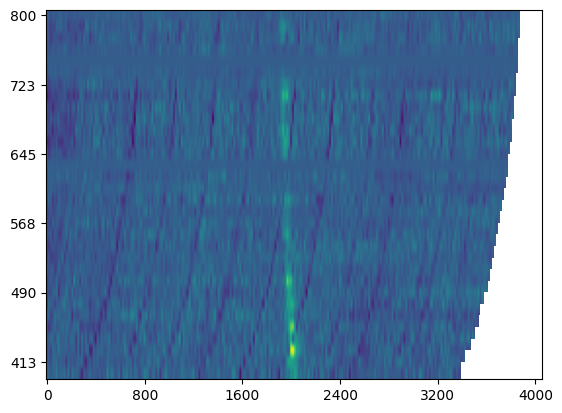

In [24]:
df1 = test_DM(25, x_bins, y_bins, df)
plotPulse(df1, x_bins, y_bins, 6, 6, 'dm25')

In [12]:
def get_snr(df, DM_list, x_bins, y_bins):
    snr_list = []
    
    for DM in DM_list:
        df_test = test_DM(DM, x_bins, y_bins, df)
        
        time_series = df_test.sum(axis='rows')
        time_series = np.array(time_series)
        time_series = np.abs(time_series)

        max_ts = time_series.max()
        mean_ts = time_series.mean()
        snr = max_ts/mean_ts
        snr_list.append(snr)
    
    return snr_list

In [19]:
dms = np.arange(15, 40, 0.5)
dms

array([15. , 15.5, 16. , 16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ,
       20.5, 21. , 21.5, 22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5,
       26. , 26.5, 27. , 27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. ,
       31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5,
       37. , 37.5, 38. , 38.5, 39. , 39.5])

In [20]:
snr_s = get_snr(df, dms, x_bins, y_bins)
print(snr_s)

[4.3746424, 4.650634, 4.689116, 4.8724823, 5.0609565, 7.243136, 5.74046, 7.000512, 7.1708302, 6.2423954, 7.3526487, 6.35007, 6.690449, 6.7927513, 6.9683666, 7.5296245, 8.421918, 7.645616, 9.234945, 9.945541, 9.817368, 11.096557, 12.813185, 12.221912, 13.277248, 13.655642, 14.261343, 14.41736, 15.447409, 15.832136, 15.530168, 16.091887, 15.031262, 14.23515, 15.455849, 13.721052, 13.549742, 12.988502, 12.282337, 11.676736, 10.600353, 11.314322, 9.803944, 8.91091, 9.084663, 8.352638, 8.205743, 8.075008, 7.45122, 7.9868183]


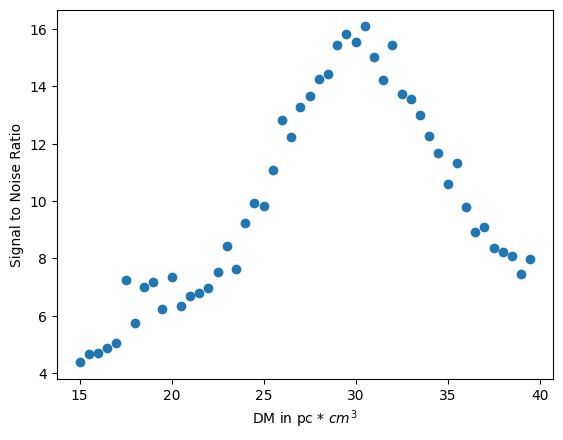

In [21]:
plt.scatter(dms, snr_s)
plt.xlabel('DM in pc * $cm^3$')
plt.ylabel('Signal to Noise Ratio')
# plt.show()
tikzplotlib.save('snr_test.tex')

In [16]:
# get optimum DM
optimum_index = snr_s.index(max(snr_s))
print(round(dms[optimum_index], 3))

30.25


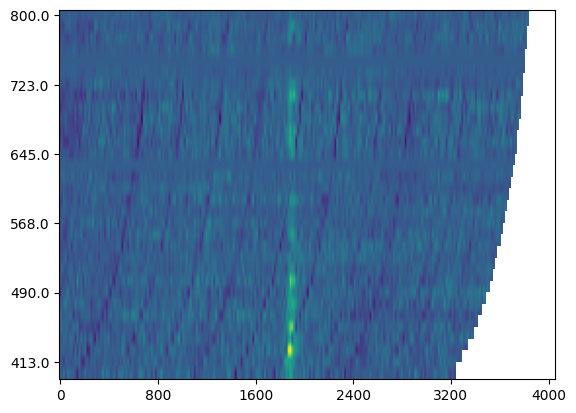

In [17]:
df_best = test_DM(30.25, x_bins, y_bins, df)
plotPulse(df_best, x_bins, y_bins, 6, 6)

In [ ]:
delay(1, 2)